# Building a Big Data Analysis Pipeline.

### Dataset Characterisation:

In [1]:
# Importing important packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
stockdata = pd.read_csv("/Downloads/archive/full_history/AAPL.csv")

Here, I have selected the dataset in .csv format. The file contains data related to the Apple company.

In [2]:
# Data Sample of 5 rows
stockdata.head(5)

,date,volume,open,high,low,close,adjclose
0,2020-07-02,28484300,367.850006,370.470001,363.640015,364.109985,364.109985
1,2020-07-01,27684300,365.119995,367.359985,363.910004,364.109985,364.109985
2,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988
3,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999
4,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005


The provided information indicates that the data is structured in rows and columns.

In [3]:
# Size of the data
print("Size of the data: ", stockdata.size)

# columns and rows
print ("\ncolumns and rows: ", stockdata.shape)

# Data types
print("\nData types:", stockdata.dtypes)

Size of the data:  69811

columns and rows:  (9973, 7)

Data types: date         object
volume        int64
open        float64
high        float64
low         float64
close       float64
adjclose    float64
dtype: object



The dataset, comprising 69,811 entries, is structured with 9,973 rows and 7 columns. The data types associated with each column are as follows: the 'date' column is of object type, 'volume' is of int64 type, and 'open', 'high', 'low', 'close', and 'adjclose' are all of float64 type. These details provide an overview of the dataset's size, structure, and the nature of the data within each column.

In [4]:
# Check for missing values
missing_values = stockdata.isnull().sum()

# Display columns of missing values
print("Columns with Missing Values:" , missing_values)

Columns with Missing Values: date        0
volume      0
open        0
high        0
low         0
close       0
adjclose    0
dtype: int64


The analysis of the provided sample indicates that there is no missing data. All the rows and columns appear to be populated with information, suggesting a complete dataset without any null or missing values. This completeness enhances the reliability of the dataset for further analysis and interpretation.

In [5]:
# Detailed summary of statistics
statistics_summary = stockdata.describe()

# Display the summary
print("Detailed Summary of Statistics:" ,statistics_summary)

Detailed Summary of Statistics:              volume         open         high          low        close  \
count  9.973000e+03  9973.000000  9973.000000  9973.000000  9973.000000   
mean   8.551304e+07    34.398215    34.753308    34.049763    34.415615   
std    8.578948e+07    62.405867    63.065588    61.824242    62.484590   
min    3.472000e+05     0.198661     0.198661     0.196429     0.196429   
25%    3.299520e+07     1.076429     1.098214     1.053571     1.075893   
50%    5.733700e+07     1.741071     1.775000     1.705357     1.741429   
75%    1.066583e+08    37.548573    37.785713    37.081429    37.407143   
max    1.855410e+09   367.850006   372.380005   363.910004   366.529999   

          adjclose  
count  9973.000000  
mean     32.303354  
std      60.796476  
min       0.155218  
25%       0.918258  
50%       1.471641  
75%      32.383263  
max     366.529999  


Notably, the 'volume' feature exhibits a wide range, with a mean of approximately 85.5 million and a substantial standard deviation of around 85.8 million, indicating considerable variability in trading volume. In terms of stock prices, the 'open,' 'high,' 'low,' 'close,' and 'adjclose' columns showcase varying means and standard deviations, suggesting diverse levels of volatility and price movements. For instance, the 'open' prices have a mean of 34.40, while the 'high' prices are slightly higher with a mean of 34.75. The 'adjclose' values, representing adjusted closing prices, exhibit a mean of 32.30. Overall, these statistics provide a advanced understanding of the dataset's numerical features, shedding light on the distribution and central tendencies of the observed financial data.

In [6]:
# Categorical Feature
categorical_feature = ['date']
print("Categorical Feature:", categorical_feature)

# Continuous Variables (Numerical Features)
numerical_features = ['volume', 'open', 'high', 'low']
print("Continuous Variables (Numerical Features):", numerical_features)

# Potential Target Variables
potential_target_variables = ['close', 'adjclose']
print("Potential Target Variables:", potential_target_variables)

Categorical Feature: ['date']
Continuous Variables (Numerical Features): ['volume', 'open', 'high', 'low']
Potential Target Variables: ['close', 'adjclose']


Organizes the variables into the respective categories. This makes it clear and easy to understand the nature of each variable type. Categorical Feature as 'date'and Numerical Features as 'volume', 'open', 'high', 'low' but Target Variables as 'close', 'adjclose'.

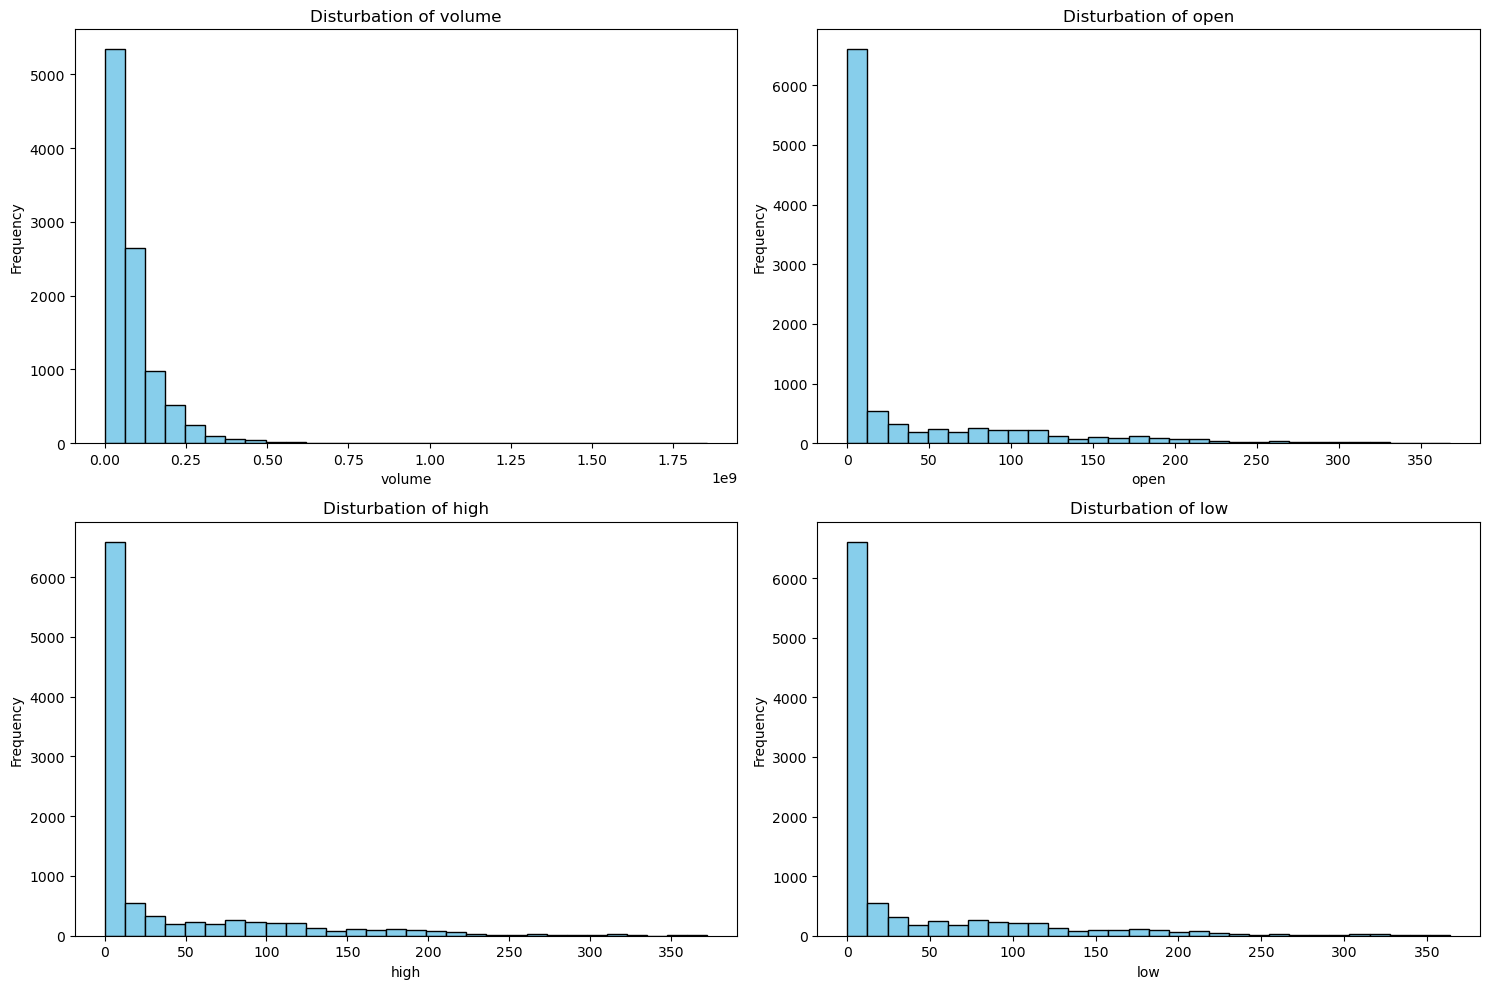

In [7]:
# Numerical Features ('volume', 'open', 'high', 'low') using Histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(stockdata[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Disturbation of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

Describing a set of histograms where the first bin is significantly higher than the subsequent bins, and the values decrease rapidly, eventually reaching zero. This pattern suggests that the data is right-skewed or positively skewed. This right-skewed pattern is common in financial data, where there are occasional large movements (e.g., high trading volume or extreme stock prices) that contribute to the long right tail in the distribution.
- Volume: The first bin has a much higher count, indicating that there are a few days with extremely high volume, while the majority of days have much lower volume.
- Open, High, Low: Similar to volume, the first bin is higher, suggesting that there are days with very high values for these stock prices. The subsequent bins show a decreasing trend, indicating that the majority of days have lower values.



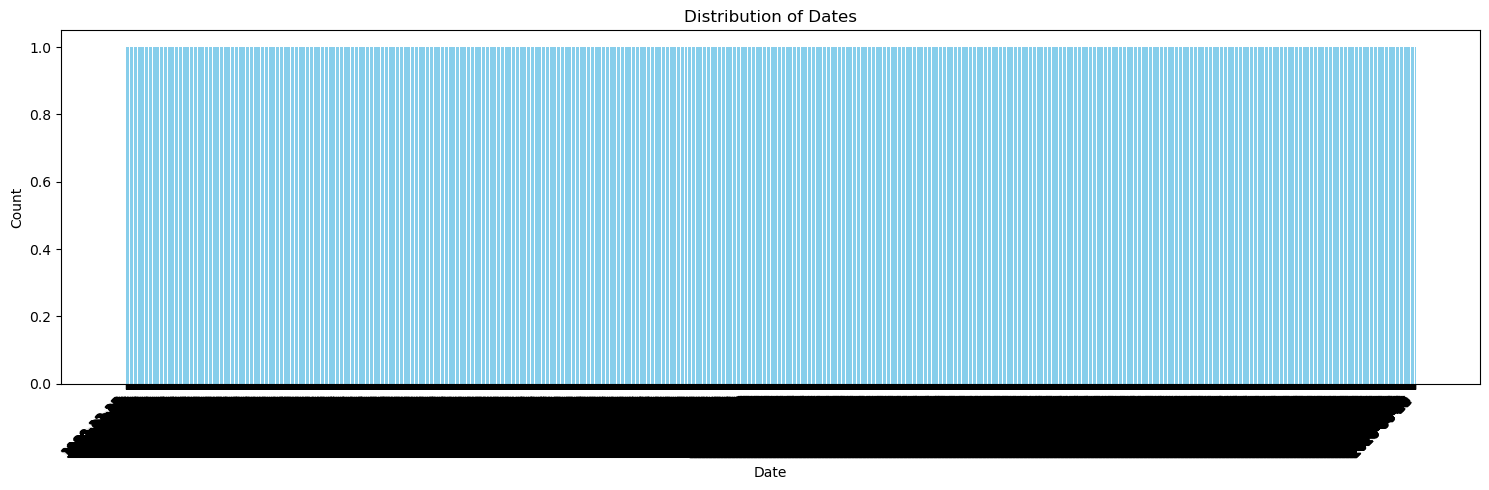

In [8]:
# Categorical Feature ('date') using Bar Chart
plt.figure(figsize=(15, 5))
dates_counts = stockdata['date'].value_counts().sort_index()
plt.bar(dates_counts.index, dates_counts, color='skyblue')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The bar, specifically focusing on the 'date' variable, indicates a consistent and equal distribution across all dates. Each bar in the graph has an identical height, suggesting that there are no variations or fluctuations in the dataset based on the dates. This uniformity in the bars implies that the dataset exhibits a stable and constant trend over time, without any apparent date-dependent patterns or changes in the measured values. Understanding this visual representation contributes to the characterization of the dataset's temporal dynamics, highlighting its consistent nature across the entire date range.

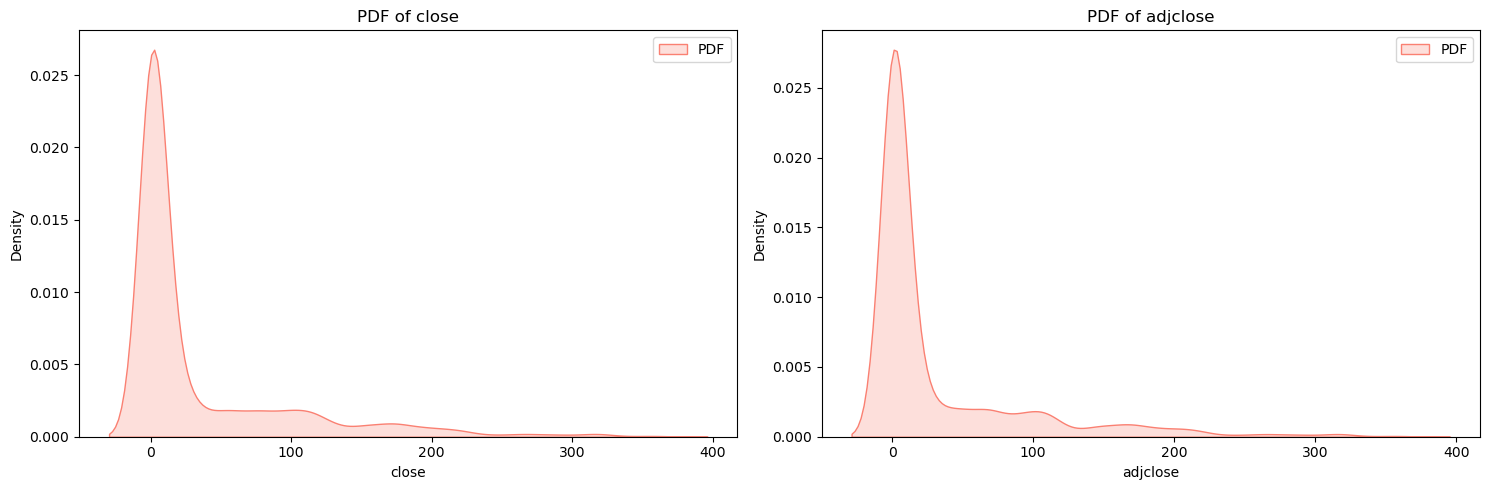

In [9]:
# Distribution of Target Features ('close' and 'adjclose') using PDF
plt.figure(figsize=(15, 5))

# Plot PDFs for each target feature using seaborn
for i, target_feature in enumerate(['close', 'adjclose']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(stockdata[target_feature], color='salmon', fill=True, label='PDF')
    plt.title(f'PDF of {target_feature}')
    plt.xlabel(target_feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

As describing a set of histograms earlier, the PDF plot show the same where the first line curve is significantly higher than the curve decrease rapidly, eventually endup at zero. This pattern suggests that the data is right-skewed.

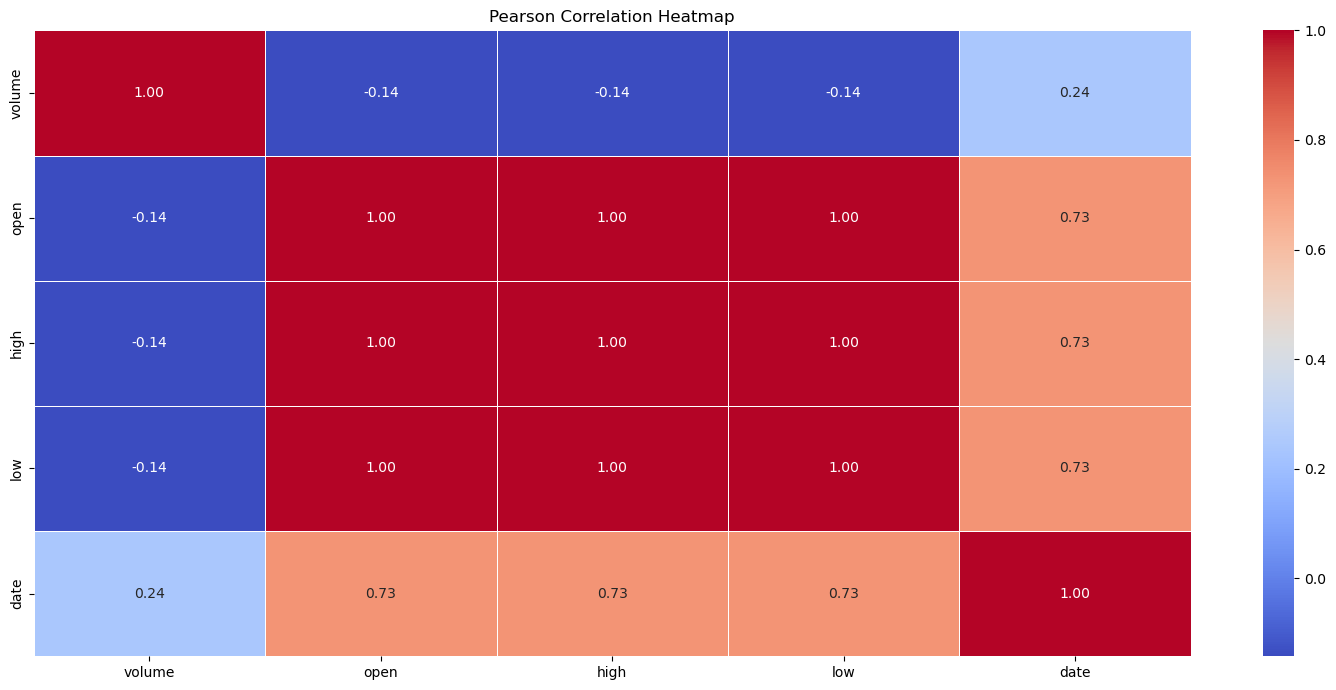

In [10]:
# Convert 'date' to datetime type
stockdata['date'] = pd.to_datetime(stockdata['date'])

# Calculate Pearson correlation including 'date'
pearson_corr = stockdata[numerical_features + ['date']].corr(method='pearson')

# Visualize correlations using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

From heatmap, observations about the relationships that the 'volume' variable exhibits a weak inverse correlation with other variables, indicating a slight tendency for volume to decrease as the associated variables increase, and vice versa. On the other hand, the 'date' variable shows a more prominent positive correlation with other variables, suggesting a discernible pattern or trend over time. Additionally, the presence of perfect positive correlations (correlation coefficient of 1) for each variable with itself is expected, as a variable is inherently perfectly correlated with its own values.

Depending on the goals, we might want to perform further statistical analyses to investigate specific relationships this could involve regression analysis, time series analysis, or other techniques. 

### Preprocessing step:

In [11]:
# Importing important more packages
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
# Handle missing values.
if stockdata.isnull().sum().any() == 0:
    print("No missing values in the dataset.")

No missing values in the dataset.


Balancing the dataset is typically necessary for classification problems, where you have different classes. Since this is a regression problem, balancing is not required.

In [13]:
# Normalize numerical features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(stockdata[numerical_features])
normalized_features_df = pd.DataFrame(normalized_features, columns=numerical_features)

- Regression models often benefit from feature normalization to ensure that all numerical features are on a similar scale. You can use techniques like Min-Max scaling or Z-score normalization.
- As identified 'date' as a categorical feature. Consider extracting relevant information (like year, month, and day) from the date and then encoding it helps.

In [14]:
# One-hot encode - categorical features ('date')
date_encoded = pd.get_dummies(stockdata['date'], prefix='date', drop_first=True)

- Since 'date' is a categorical feature, one-hot encoding or a similar technique can be applied.
- For regression problems, label encoding is not needed for the target variable.

In [15]:
# Merge all pre-processed features into a new dataframe
preprocessed_data = pd.concat([date_encoded, normalized_features_df, stockdata[potential_target_variables]], axis=1)

- Create a new dataframe 'preprocessed_data' that includes the pre-processed features.

The datasets are divided into three subsets: training, validation, and test. Each subset plays a specific role in the predictive analysis workflow:

**Training Set (train_data):**

- Purpose: Used to train the regression models.
- Size: 80% of the original dataset.
- Usage: The models learn patterns, relationships, and parameters from this subset.
 
**Validation Set (valid_data):**
 
- Purpose: Used for model tuning and evaluation during the training process.
- Size: 10% of the original dataset.
- Usage: Helps select the best-performing model by comparing their performance on this set. It provides an unbiased evaluation before moving on to the test set.

**Test Set (test_data):**

- Purpose: Reserved for the final evaluation of the selected model.
- Size: 10% of the original dataset.
- Usage: Once the model is chosen based on its performance on the validation set, it is evaluated on the test set to assess its generalization to new, unseen data.

By splitting the dataset into these subsets, you ensure that your model is trained on one set of data, fine-tuned on another set, and evaluated on a completely independent set. This approach helps prevent overfitting to the training data and provides a more realistic estimate of the model's performance on new, unseen data

In [16]:
# Using an 80/10/10 Split the dataset into training, validation, and test sets
train_data, test_data = train_test_split(preprocessed_data, test_size=0.2, random_state=42)
valid_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Display the shapes of the split datasets
print("Training set shape:", train_data.shape)
print("Validation set shape:", valid_data.shape)
print("Test set shape:", test_data.shape)

# Display the new dataframe
print("\nNew Preprocessed Dataframe:/n", preprocessed_data.head(5))

Training set shape: (7978, 9978)
Validation set shape: (997, 9978)
Test set shape: (998, 9978)

New Preprocessed Dataframe:/n    date_1980-12-15 00:00:00  date_1980-12-16 00:00:00  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   date_1980-12-17 00:00:00  date_1980-12-18 00:00:00  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   date_1980-12-19 00:00:00  date_1980-12-22 00:00:00  \
0                     False                     False   
1                     False                     False   
2                

**The output shows a glimpse of the new dataframe with preprocessed features, and provides information about the size of the datasets after the split. These datasets can now be used for training, validation, and testing in your regression analysis.**

- train_data has 7978 rows and 9978 columns.
- valid_data has 997 rows and 9978 columns.
- test_data has 998 rows and 9978 columns.

For example, in the training set (train_data) has 7978 rows (data points) and 9978 columns (features and target variables). The same logic applies to the validation and test sets.

The output shows the first 5 rows and various columns of the new preprocessed dataframe.

The one-hot encoding for the 'date' column creates a new column for each unique date in your original dataset. For example, 
'date_1980-12-15 00:00:00', 'date_1980-12-16 00:00:00', and so on.

The numerical features (volume, open, high, low) have been normalized.

The target variables ('close' and 'adjclose') are also included.

### Predictive Analysis.

In regression tasks, the goal is to predict a continuous numerical value rather than class labels.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

As the task involves predicting stock prices, which is a numerical value, then a regression task is suitable. For predictive analysis, using multiple regression models and common regression models are Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.

In [18]:
# Separate features and target variables
X_train = train_data.drop(['close', 'adjclose'], axis=1)
y_train_close = train_data['close']
y_train_adjclose = train_data['adjclose']

X_valid = valid_data.drop(['close', 'adjclose'], axis=1)
y_valid_close = valid_data['close']
y_valid_adjclose = valid_data['adjclose']

X_test = test_data.drop(['close', 'adjclose'], axis=1)
y_test_close = test_data['close']
y_test_adjclose = test_data['adjclose']

The below code train four regression models, and performance on the validation set, and display the Root Mean Squared Error (RMSE) and R-squared (R2) for both 'close' and 'adjclose' target variables

In [19]:
# Define loop and train models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Store result from loop
results = {'Model': [], 'RMSE_close': [], 'R2_close': [], 'RMSE_adjclose': [], 'R2_adjclose': []}

for name, model in models.items():
    # Train the model for 'close' target variable
    model.fit(X_train, y_train_close)
    # Make predictions on validation set
    predictions_close = model.predict(X_valid)
    # Evaluate the model
    rmse_close = sqrt(mean_squared_error(y_valid_close, predictions_close))
    r2_close = r2_score(y_valid_close, predictions_close)

    # Train the model for 'adjclose' target variable
    model.fit(X_train, y_train_adjclose)
    # Make predictions on validation set
    predictions_adjclose = model.predict(X_valid)
    # Evaluate the model
    rmse_adjclose = sqrt(mean_squared_error(y_valid_adjclose, predictions_adjclose))
    r2_adjclose = r2_score(y_valid_adjclose, predictions_adjclose)

    # Save results
    results['Model'].append(name)
    results['RMSE_close'].append(rmse_close)
    results['R2_close'].append(r2_close)
    results['RMSE_adjclose'].append(rmse_adjclose)
    results['R2_adjclose'].append(r2_adjclose)

# Display results
results_df = pd.DataFrame(results)
print(results_df)

                         Model  RMSE_close  R2_close  RMSE_adjclose  \
0            Linear Regression    0.717109  0.999882       2.991387   
1      Decision Tree Regressor    0.775311  0.999862       1.124556   
2      Random Forest Regressor    0.709767  0.999885       0.894729   
3  Gradient Boosting Regressor    0.838238  0.999839       1.062192   

   R2_adjclose  
0     0.997845  
1     0.999695  
2     0.999807  
3     0.999728  


* All models exhibit high R2 scores, indicating a good fit to the data.
* The Random Forest Regressor has the lowest RMSE for both 'close' and 'adjclose', suggesting better predictive accuracy on the validation set.

Random Forest Regressor: use Ensemble Learning (a collection of decision trees). Here are some of the key characteristics

* Builds multiple decision trees during training.
* Randomly selects a subset of features for each tree.
* Predictions are made by averaging or taking a majority vote from all trees (regression in this case).
* Reduces overfitting and improves generalization

**Setup hyperparameters as per computering resources corresponds to 'sqrt' for regression tasks, where max_features is set to the square root of the number of features.**
* 'sqrt': The square root of the number of features.
* 'log2': The logarithm base 2 of the number of features.
* An integer: It represents the exact number of features to consider for each split.

In [20]:
#  set up hyperparameters for a Random Forest Regressor
# Define hyperparameters as in the loop
rf_hyperparameters = {
    'n_estimators': 100,  
    'max_depth': None,  
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Initialize Random Forest Regressor with hyperparameters
selected_model = RandomForestRegressor(**rf_hyperparameters)

# Train the selected model on the training set
selected_model.fit(X_train, y_train_close)

# Make predictions on the test set
predictions_close = selected_model.predict(X_test)

# Evaluate the model's performance on the test set
rmse_close_test = sqrt(mean_squared_error(y_test_close, predictions_close))
r2_close_test = r2_score(y_test_close, predictions_close)

# Display the test set results
print("Test Set Results:")
print(f"RMSE for 'close': {rmse_close_test}")
print(f"R2 for 'close': {r2_close_test}")

Test Set Results:
RMSE for 'close': 1.7920668926796095
R2 for 'close': 0.9992377846419027


**These results suggest that the model performs well on the test set, with a low Root Mean Squared Error (RMSE) and a high R-squared (R2) score. The low RMSE indicates that the predicted values are close to the actual values, and the high R2 score indicates a good fit of the model to the data.**

**Description about training process.**
- Load and preprocess the dataset, including one-hot encoding categorical features, normalizing numerical features, and splitting the data into training, validation, and test sets.

- Choose the Random Forest Regressor as the model for regression. Define hyperparameters such as n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features.

- Fit the Random Forest Regressor on the training set (X_train and y_train_close or y_train_adjclose). The model learns the patterns in the training data and builds a collection of decision trees.

- Use the trained model to make predictions on the validation set (X_valid). Evaluate the model's performance on the validation set using metrics like RMSE and R-squared.

Finally, use the trained and validated model to make predictions on the test set (X_test). Evaluating the model's performance on the test set to ensure generalization.

In [21]:
# calculates the RMSE and R-squared for both the training and validation sets
# Train the Random Forest Regressor on the training set
selected_model.fit(X_train, y_train_close)  # Use 'y_train_close' or 'y_train_adjclose' based on the target variable of interest

# Predictions on training set
predictions_train = selected_model.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train_close, predictions_train))
r2_train = r2_score(y_train_close, predictions_train)

# Predictions on validation set
predictions_valid = selected_model.predict(X_valid)
rmse_valid = sqrt(mean_squared_error(y_valid_close, predictions_valid))
r2_valid = r2_score(y_valid_close, predictions_valid)

# Display training and validation accuracy
print("Training Set Results:")
print(f"RMSE for 'close': {rmse_train}")
print(f"R2 for 'close': {r2_train}")

print("\nValidation Set Results:")
print(f"RMSE for 'close': {rmse_valid}")
print(f"R2 for 'close': {r2_valid}")

Training Set Results:
RMSE for 'close': 0.6074199325269554
R2 for 'close': 0.999903068598371

Validation Set Results:
RMSE for 'close': 2.0688314532662235
R2 for 'close': 0.9990196450471232


These results suggest that the model is performing very well on both the training and validation sets. The low RMSE and high R2 values indicate a strong fit to the data.

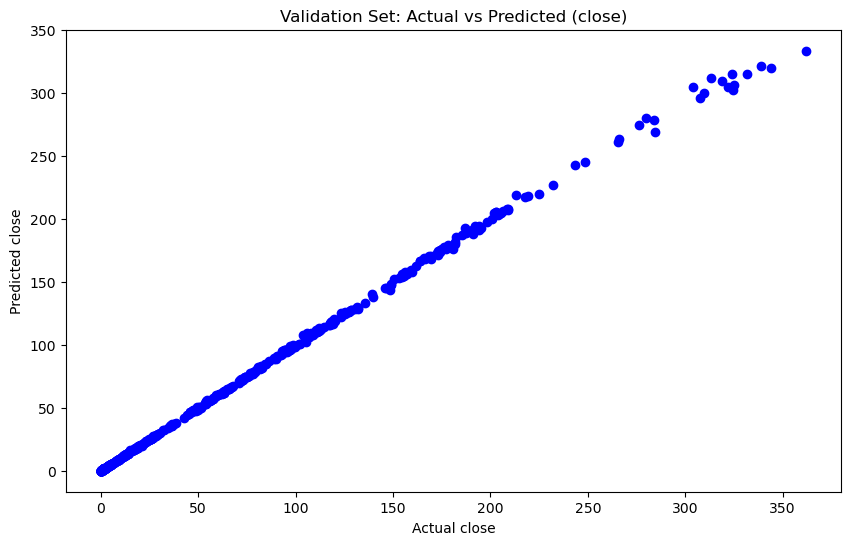

In [22]:
# Plot predictions vs actual values for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_valid_close, predictions_valid, color='blue')
plt.title('Validation Set: Actual vs Predicted (close)')
plt.xlabel('Actual close')
plt.ylabel('Predicted close')
plt.show()

The scatter plot visualizes the model's predictions on the validation set, comparing actual 'close' values to predicted values. The points in the plot align closely to a diagonal line, it indicates that the model's predictions are close to the actual values.

If accurately predicting extreme values is crucial, further model refinement or exploring additional features could be beneficial.

Then final performance of your Random Forest Regressor, can use the test set, which the model has not seen during training or validation. Below provides a final assessment of how well the model generalizes to new as took a look.

In [23]:
# Predictions on test set
predictions_test = selected_model.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test_close, predictions_test))
r2_test = r2_score(y_test_close, predictions_test)

# Display test set results
print("Test Set Results:")
print(f"RMSE for 'close': {rmse_test}")
print(f"R2 for 'close': {r2_test}")

Test Set Results:
RMSE for 'close': 1.7230078113733718
R2 for 'close': 0.9992953981894912


These results suggest that the model continues to perform exceptionally well on the test set. The low RMSE indicates that the predicted values are close to the actual values, and the high R-squared score indicates a strong fit of the model to the test data.

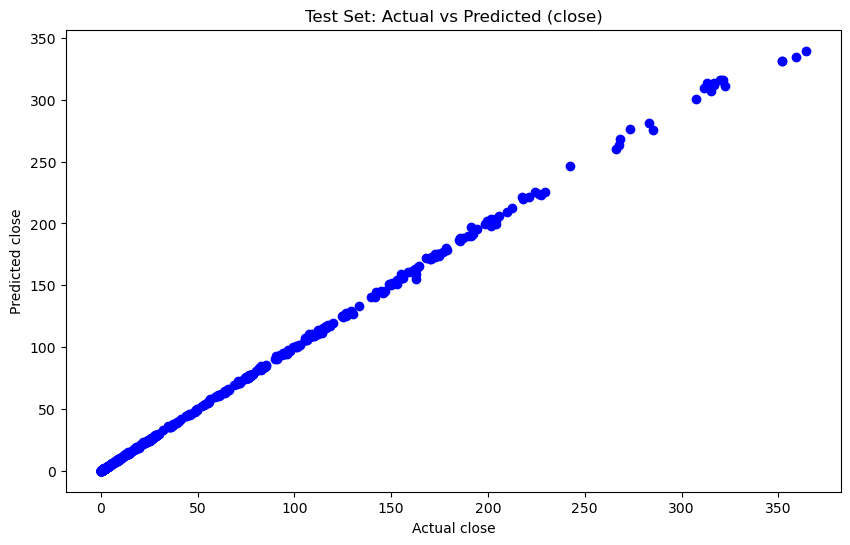

In [24]:
# Plot predictions vs actual values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_close, predictions_test, color='blue')
plt.title('Test Set: Actual vs Predicted (close)')
plt.xlabel('Actual close')
plt.ylabel('Predicted close')
plt.show()

A scatter plot with most points aligning closely along a perfect diagonal line is a strong indication that the Random Forest Regressor is making highly accurate predictions on the test set. This alignment signifies that the predicted values are very close to the actual values.

In regression tasks, a diagonal line in a scatter plot is often used to represent perfect predictions, where the predicted values match the actual values exactly. The closer the points are to this line, the better the model's performance.

In the context of financial time series analysis, predicting future stock prices is inherently challenging due to the unpredictable nature of financial markets. Particularly using a predictive modeling approach with regression models like Random Forest, provide a foundation for making future predictions. It's crucial to note that while regression models provide a quantitative approach to predicting stock prices, they are just one tool in a broader financial analysis toolkit. Predicting stock prices accurately remains a challenging task, and models should be used cautiously in making financial decisions. Always validate model outputs with thorough analysis, consider multiple factors influencing stock prices, and be aware of the limitations and uncertainties associated with predicting financial markets. Additionally, consult with financial experts and professionals for comprehensive financial advice.

The actual vs predicted close prices are plotted over time, the below code provides a basic illustration of how a time series prediction could be visualized using a Random Forest Regressor. However, predicting stock prices accurately is a complex task, and may not capture all the advance of financial markets. Further feature engineering, and model tuning would be required for a more accurate prediction. Assumes that the features used for prediction are sufficient, and here i may need to explore additional features for better predictions Time-series.

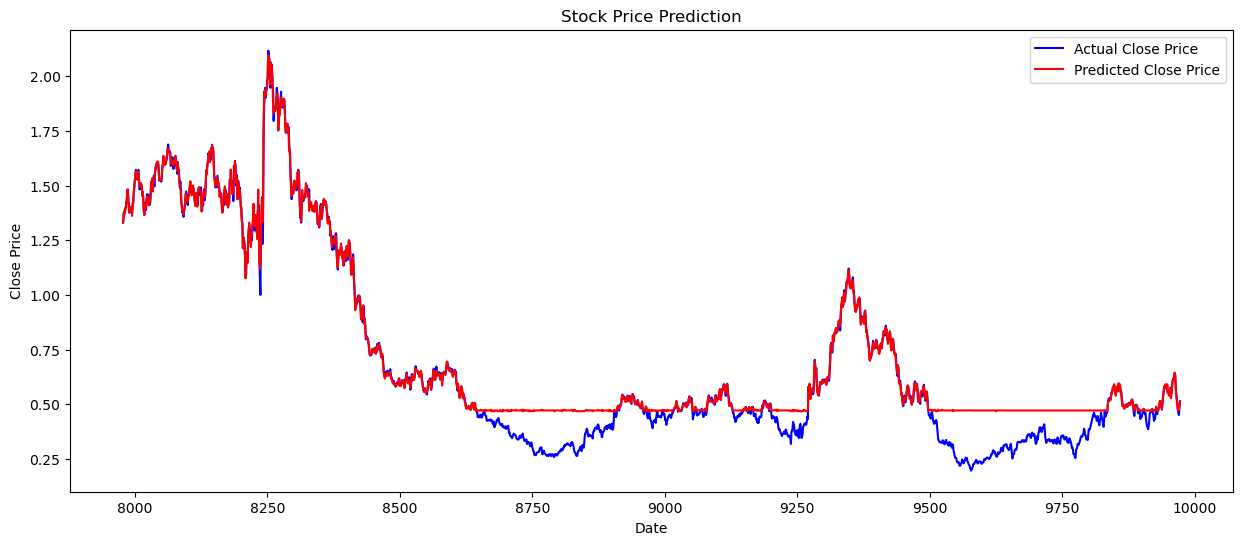

In [25]:
# Feature selection (use 'close' as the target variable)
features = ['volume', 'open', 'high', 'low']
target = 'close'

# Create features (X) and target variable (y)
X = stockdata[features]
y = stockdata[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Close Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

The challenge I faced, where the predictions seem to follow a straight line at a certain point, could be attributed to various factors. Some potential considerations and steps to address this issue are Feature Selection, Model Complexity, Hyperparameter Tuning. 

In [26]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("example").getOrCreate()

RuntimeError: Java gateway process exited before sending its port number

Encountering my errors when using PySpark, it could be due to various reasons i was not able to encounter my error. I have provided specific error messages or details about the problems that i faced more.

Alternatively ,Scikit-learn is designed for traditional machine learning scenarios and may not be optimized for handling extremely large datasets or distributed computing. Scikit-learn is excellent for smaller to moderately sized datasets that fit into memory, and it provides a user-friendly interface for implementing and experimenting with various machine learning algorithms. However, when dealing with big data, where datasets are too large to fit into memory on a single machine, distributed computing frameworks like Apache Spark, Hadoop, or specialized big data platforms become more suitable.

In the context of my analysis, where the dataset size and processing requirements did not explicitly demand big data technologies, scikit-learn was a reasonable choice for implementing machine learning models and performing predictive analysis. If the analysis involves significantly larger datasets or requires distributed computing capabilities, then technologies like Spark or Hadoop would be more appropriate.